In [13]:
from __future__ import division
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import tensorflow as tf


### Reading data

In [15]:
"""Read train and test data """
train_data = pd.read_csv('ex4_train.csv')
test_data = pd.read_csv('ex4_test.csv')

"""x and y of train data"""
X_train_df = train_data.iloc[:,1:-1]
Y_train_df = pd.DataFrame(train_data.y)


"""x and y of test data"""
X_test_df = test_data.iloc[:,1:-1]
Y_test_df = pd.DataFrame(test_data.y)
#print(X_train_df.shape)


In [16]:
"""Convert train x and y into matrices"""
x_train = np.array(X_train_df)  
y1_train = np.array(Y_train_df)  


"""Convert test x and y into matrices"""
x_test = np.array(X_test_df)  
y1_test = np.array(Y_test_df)  

y_1 = y1_train.reshape(3500)
y_1_test = y1_test.reshape(1500,)

y_train = y_1
y_test = y_1_test



In [17]:
test_accuracy = []
train_accuracy = []
learning_rate = 0.001
probs = [0.3, 0.7, 0.8, 0.9]
graph = tf.Graph()
with graph.as_default():
    # init weights
    tf.set_random_seed(1)
    W1 = tf.get_variable("W1", shape=[150, 400], initializer=tf.contrib.layers.xavier_initializer())
    #b1 = tf.get_variable("b1", shape=[100, 1], initializer=tf.contrib.layers.xavier_initializer())

    # and the weights connecting the hidden layer to the output layer
    W2 = tf.get_variable("W2", shape=[70, 150], initializer=tf.contrib.layers.xavier_initializer() )
    #b2 = tf.get_variable("b2", shape=[25, 1], initializer=tf.contrib.layers.xavier_initializer())


    W3 = tf.get_variable("W3", shape=[10, 70], initializer=tf.contrib.layers.xavier_initializer() )

    b1 = tf.zeros([150, 1], tf.float32)
    b2 = tf.zeros([70, 1], tf.float32)
    b3 = tf.zeros([10, 1], tf.float32)

    x = tf.placeholder("float32", [None, 400])
    y = tf.placeholder("int32", [None,])
    keep_prob = tf.placeholder(tf.float32)
    #keep_prob2 = tf.placeholder(tf.float32)
    y_en = tf.one_hot(y, 10, on_value=1.0, off_value=0.0, axis=-1)

    def model(x, W1, W2, W3, b1, b2, b3):
        # hidden layer with RELU activation
        A1 = tf.nn.relu(tf.add(tf.transpose(tf.matmul(x, tf.transpose(W1))), b1))
        # apply DropOut to hidden layer
          # DROP-OUT here
        drop_out_A1 = tf.nn.dropout(A1, keep_prob)  # DROP-OUT here
        
        A2 = tf.nn.relu(tf.add(tf.matmul(W2, drop_out_A1), b2))
        # output layer with linear activation
        drop_out_A2 = tf.nn.dropout(A2, keep_prob)
        
        A3 = tf.nn.sigmoid(tf.add(tf.matmul(W3, drop_out_A2), b3))
        #A3 = tf.nn.sigmoid(tf.add(tf.matmul(W3, A2), b3))
        A3 = tf.transpose(A3)
        return A3

    # Construct model
    
    pred = model(x, W1, W2, W3, b1, b2, b3)
    soft = tf.nn.softmax(pred)

    # Define loss and optimizer
    #cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y_en))
    y_clipped = tf.clip_by_value(pred, 1e-10, 0.9999999)
    cost = (-1) * tf.reduce_sum(tf.multiply(y_en, tf.log(y_clipped)) + tf.multiply(1 - y_en, tf.log(1 - y_clipped)))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# run the grap
    
with tf.Session(graph=graph) as sess:
    
    for p in probs:
        
        tf.global_variables_initializer().run()
      
        # Training cycle

        for epoch in range(1001):
            _, c = sess.run([optimizer, cost], feed_dict={x: x_train, y: y_train, keep_prob : p})
                # Compute average loss
            totalcost = c / 3500
            

       
        correct_prediction = tf.equal(tf.argmax(soft, 1), tf.argmax(y_en, 1))
        
        # Calculate accuracy
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
       
        train_accuracy.append(accuracy.eval({x: x_train, y: y_train, keep_prob : 1.0}))
        test_accuracy.append(accuracy.eval({x: x_test, y: y_test, keep_prob : 1.0}))
        if(p == 0.8):
            print("Train data accuracy : ", 100 * accuracy.eval({x: x_train, y: y_train, keep_prob : 1.0}))
            print("Test data accuracy:", 100 * accuracy.eval({x: x_test, y: y_test, keep_prob : 1.0}))
        
    #i = tf.argmax(test_accuracy)
   
            
        

Train data accuracy :  100.0
Test data accuracy: 94.46666836738586


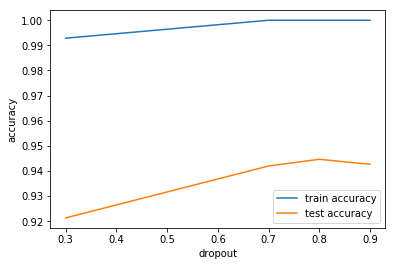

In [18]:
plt.plot(probs, train_accuracy, label='train accuracy')
plt.plot(probs, test_accuracy, label='test accuracy')
plt.xlabel("dropout")
plt.ylabel("accuracy")
plt.legend()